In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["label_species"]=le.fit_transform(df["species"])

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,label_species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [10]:
x=df.drop(columns=["species","label_species"])
y=df["label_species"]

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [12]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(xtrain,ytrain)
ypred=DT.predict(xtest)
ypred

array([2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2,
       1, 1, 2, 1, 2, 1, 2, 2])

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
acc=accuracy_score(ytest,ypred)
acc

0.9666666666666667

In [15]:
cm=confusion_matrix(ytest,ypred)
cm

array([[ 4,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 14]], dtype=int64)

In [16]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.92      0.96        12
           2       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.98      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



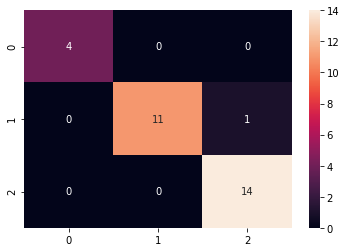

In [17]:
sns.heatmap(cm,annot=True)

In [20]:
#hyperparameter
#model
#parameter
criterion=["gini","entropy"]
max_depth=list(range(1,11))
#parameter_grid
grid={"criterion":criterion,"max_depth":max_depth}

#cv
from sklearn.model_selection import RepeatedStratifiedKFold
kfold_cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=5,random_state=0)

#grid_search_cv
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=DT,param_grid=grid,cv=kfold_cv,scoring="accuracy",n_jobs=1)
res=grid_cv.fit(xtrain,ytrain)

In [21]:
res.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [22]:
res.best_score_

0.955